
# Project: TMDb Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we well explore and analyze TMDb Movies (The Movie Database) that contains over 10,000 information about movies.

## Research Questions
> How the average ratings of movies changed over the years?  
> What movie make the biggest profit?  
> What is the relationship between popularity and profit?  
> What is the top genres of movies?   
> Who is the movie director with the highest movies rating average?

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load Dataset as DataFrame
df = pd.read_csv(r'C:\Users\acer\Downloads\tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Looking at the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# Checking for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
# Checking the shape of DataFrame
df.shape

(10866, 21)


### Data Cleansing 

In [6]:
# Selecting the columns that we are going to use
columns = ['popularity', 'original_title', 'budget', 'revenue', 'runtime', 'release_year', 'vote_average', 'genres', 'director']
df = df[columns]
df.head()

,popularity,original_title,budget,revenue,runtime,release_year,vote_average,genres,director
0,32.985763,Jurassic World,150000000,1513528810,124,2015,6.5,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow
1,28.419936,Mad Max: Fury Road,150000000,378436354,120,2015,7.1,Action|Adventure|Science Fiction|Thriller,George Miller
2,13.112507,Insurgent,110000000,295238201,119,2015,6.3,Adventure|Science Fiction|Thriller,Robert Schwentke
3,11.173104,Star Wars: The Force Awakens,200000000,2068178225,136,2015,7.5,Action|Adventure|Science Fiction|Fantasy,J.J. Abrams
4,9.335014,Furious 7,190000000,1506249360,137,2015,7.3,Action|Crime|Thriller,James Wan


In [7]:
# Checking for duplicates
df.duplicated().sum()

1

In [8]:
# Drop duplicates
df.drop_duplicates(inplace = True)

In [9]:
# Making sure that the duplicates has been dropped
df.duplicated().sum()

0

In [10]:
# Looking at dataframes information and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   original_title  10865 non-null  object 
 2   budget          10865 non-null  int64  
 3   revenue         10865 non-null  int64  
 4   runtime         10865 non-null  int64  
 5   release_year    10865 non-null  int64  
 6   vote_average    10865 non-null  float64
 7   genres          10842 non-null  object 
 8   director        10821 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 848.8+ KB


In [11]:
# We are converting release_year dtype to datetime format
df['release_year'] = pd.to_datetime(df.release_year, format = '%Y')

In [12]:
# Making sure that the change has been made
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10865 non-null  float64       
 1   original_title  10865 non-null  object        
 2   budget          10865 non-null  int64         
 3   revenue         10865 non-null  int64         
 4   runtime         10865 non-null  int64         
 5   release_year    10865 non-null  datetime64[ns]
 6   vote_average    10865 non-null  float64       
 7   genres          10842 non-null  object        
 8   director        10821 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 848.8+ KB


In [13]:
# Looking at statistical summary of dataframe
df.describe()

,popularity,budget,revenue,runtime,vote_average
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,5.975012
std,1.000231,3.091428e+07,1.170083e+08,31.382701,0.935138
min,0.000065,0.000000e+00,0.000000e+00,0.000000,1.500000
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,5.400000
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,6.000000
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,6.600000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9.200000


In [14]:
# The budget, revenue, and runtime min value is 0, we replace the 0 with nan so we can drop the null values
nan_columns = ['budget', 'revenue', 'runtime']
df[nan_columns] = df[nan_columns].replace(0, np.nan)

In [15]:
# Drop null values
df.dropna(inplace = True)

In [16]:
# Making sure there is no null values
df.isnull().sum()

popularity        0
original_title    0
budget            0
revenue           0
runtime           0
release_year      0
vote_average      0
genres            0
director          0
dtype: int64

In [17]:
# Last glance at dataframe before exploring
print(df.describe())
print(df.shape)

        popularity        budget       revenue      runtime  vote_average
count  3853.000000  3.853000e+03  3.853000e+03  3853.000000   3853.000000
mean      1.191825  3.721227e+07  1.077117e+08   109.208928      6.168258
std       1.475258  4.221035e+07  1.765554e+08    19.912913      0.795001
min       0.001117  1.000000e+00  2.000000e+00    15.000000      2.200000
25%       0.462609  1.000000e+07  1.360940e+07    95.000000      5.700000
50%       0.797723  2.400000e+07  4.480678e+07   106.000000      6.200000
75%       1.368403  5.000000e+07  1.242721e+08   119.000000      6.700000
max      32.985763  4.250000e+08  2.781506e+09   338.000000      8.400000
(3853, 9)


<a id='eda'></a>
## Exploratory Data Analysis


### How the average ratings of movies changed over the years?

In [18]:
# Group movies by release year and calculate the mean of average rating
df_group_yr = df.groupby(['release_year']).mean().vote_average
df_group_yr.head(10)

release_year
1960-01-01    7.400000
1961-01-01    6.620000
1962-01-01    6.900000
1963-01-01    6.766667
1964-01-01    6.971429
1965-01-01    6.540000
1966-01-01    6.880000
1967-01-01    6.669231
1968-01-01    6.655556
1969-01-01    6.900000
Name: vote_average, dtype: float64

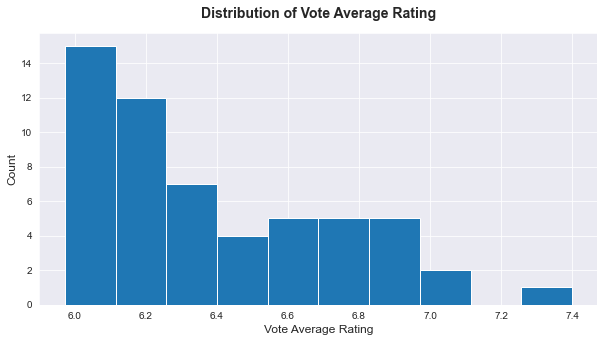

In [82]:
plt.figure(figsize=(10, 5))
plt.hist(x = df_group_yr)
plt.title('Distribution of Vote Average Rating', fontsize = 14, fontweight = 'bold', pad = 15)
plt.xlabel('Vote Average Rating', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show();

In [19]:
# Looking for the time frame of dataframe
df.release_year.min(), df.release_year.max()

(Timestamp('1960-01-01 00:00:00'), Timestamp('2015-01-01 00:00:00'))

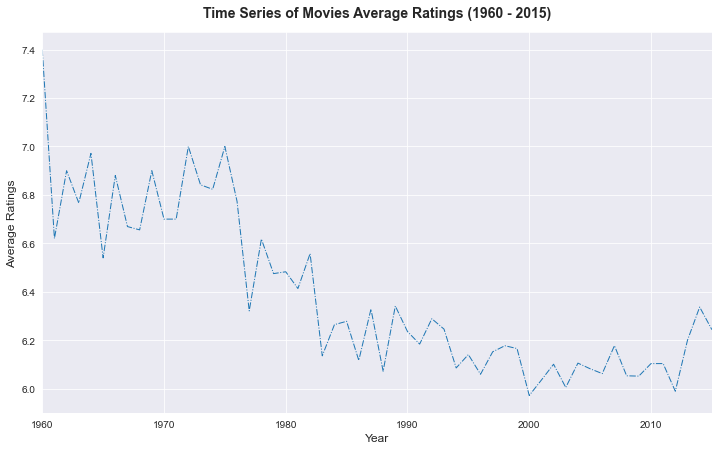

In [20]:
# Make Line Chart to show how the average movies ratings is changed over the years
plt.figure(figsize = (12, 7))
df_group_yr.plot(ls = '-.', lw = '1')
plt.title('Time Series of Movies Average Ratings (1960 - 2015)', fontsize = 14, fontweight = 'bold', pad = 15)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Average Ratings', fontsize = 12)
plt.show();

> The line chart above show us that the trends of average movies ratings from 1960 to 2015 is decreasing. Does this means that the profit also decreasing?

In [21]:
# Make a new folder that contains profit of each movies
df['profit'] = df['revenue'] - df['budget']
df.head()

,popularity,original_title,budget,revenue,runtime,release_year,vote_average,genres,director,profit
0,32.985763,Jurassic World,150000000.0,1.513529e+09,124.0,2015-01-01,6.5,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,1.363529e+09
1,28.419936,Mad Max: Fury Road,150000000.0,3.784364e+08,120.0,2015-01-01,7.1,Action|Adventure|Science Fiction|Thriller,George Miller,2.284364e+08
2,13.112507,Insurgent,110000000.0,2.952382e+08,119.0,2015-01-01,6.3,Adventure|Science Fiction|Thriller,Robert Schwentke,1.852382e+08
3,11.173104,Star Wars: The Force Awakens,200000000.0,2.068178e+09,136.0,2015-01-01,7.5,Action|Adventure|Science Fiction|Fantasy,J.J. Abrams,1.868178e+09
4,9.335014,Furious 7,190000000.0,1.506249e+09,137.0,2015-01-01,7.3,Action|Crime|Thriller,James Wan,1.316249e+09


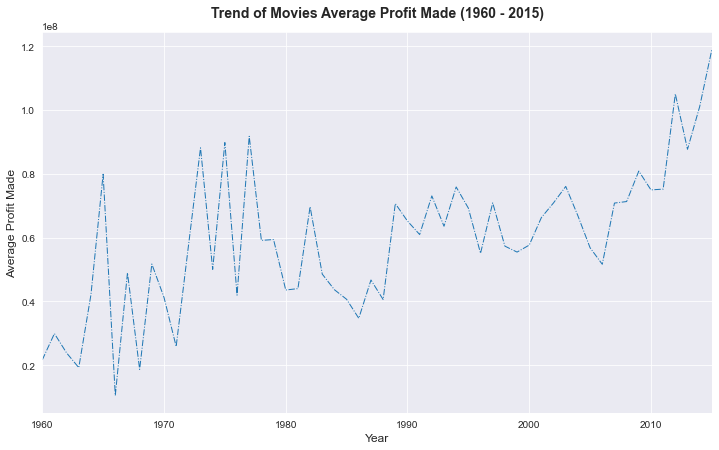

In [22]:
# Make line chart to show the change of average profit made by movies over the years
df.groupby('release_year').mean().profit.plot(figsize = (12, 7), ls='-.', lw=1)
plt.title('Trend of Movies Average Profit Made (1960 - 2015)', fontsize = 14, fontweight = 'bold', pad = 15)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Average Profit Made', fontsize = 12)
plt.show();

> Different from the average movies ratings, it looks like the profit made by movies industry is keep increasing over the years!  
> Does this means that while the quality of movies is decreasing while the profit keep going up? It could also means the standard quality of movies held by movie critics are getting higher over the years!

### What movie made the biggest profit?

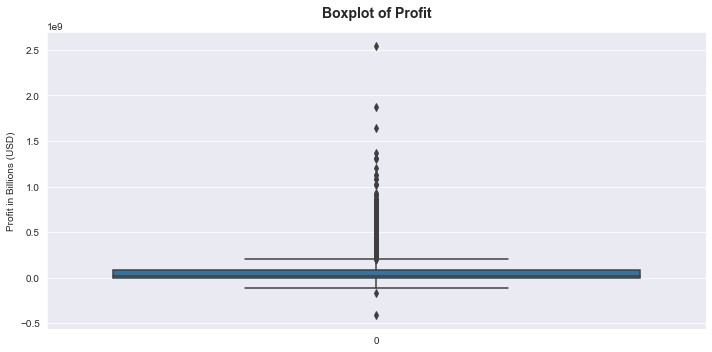

In [55]:
# Make boxplot for profit to see the distribution
plt.figure(figsize = (10, 5))
sns.boxplot(data = df['profit'])
plt.title('Boxplot of Profit', fontsize = 14, fontweight = 'bold', pad = 15)
plt.ylabel('Profit in Billions (USD)')
plt.tight_layout()
plt.show();

> There is outliers of movie profit, some movies make a much bigger profit than the majority while some is incuring losses (negative)

In [23]:
# Locate the movie with the biggest profit made
df.loc[df['profit'].idxmax()]

popularity                                         9.43277
original_title                                      Avatar
budget                                            2.37e+08
revenue                                        2.78151e+09
runtime                                                162
release_year                           2009-01-01 00:00:00
vote_average                                           7.1
genres            Action|Adventure|Fantasy|Science Fiction
director                                     James Cameron
profit                                         2.54451e+09
Name: 1386, dtype: object

> **Avatar (2009)** by James Cameron is the movie that made the biggest profit between 1960 to 2015! We can also locate movie who made the least profit as follows

In [24]:
df.loc[df['profit'].idxmin()]

popularity                                          0.25054
original_title                            The Warrior's Way
budget                                             4.25e+08
revenue                                         1.10876e+07
runtime                                                 100
release_year                            2010-01-01 00:00:00
vote_average                                            6.4
genres            Adventure|Fantasy|Action|Western|Thriller
director                                         Sngmoo Lee
profit                                         -4.13912e+08
Name: 2244, dtype: object

> There you go, movie who made the least profit is **The Warrior's Way (2010)** by Sngmoo Lee. It seems that this movie is not making profit at all but incur losses!

In [25]:
# The Top 5 Movies that made the biggest profit!
df_top = df.groupby('original_title').max().sort_values(by = 'profit', ascending = False)
df_top.head()

,popularity,budget,revenue,runtime,release_year,vote_average,genres,director,profit
original_title,,,,,,,,,
Avatar,9.432768,237000000.0,2.781506e+09,162.0,2009-01-01,7.1,Action|Adventure|Fantasy|Science Fiction,James Cameron,2.544506e+09
Star Wars: The Force Awakens,11.173104,200000000.0,2.068178e+09,136.0,2015-01-01,7.5,Action|Adventure|Science Fiction|Fantasy,J.J. Abrams,1.868178e+09
Titanic,4.355219,200000000.0,1.845034e+09,194.0,1997-01-01,7.3,Drama|Romance|Thriller,James Cameron,1.645034e+09
Jurassic World,32.985763,150000000.0,1.513529e+09,124.0,2015-01-01,6.5,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,1.363529e+09
Furious 7,9.335014,190000000.0,1.506249e+09,137.0,2015-01-01,7.3,Action|Crime|Thriller,James Wan,1.316249e+09


### What is the relationship of Popularity and Profit?

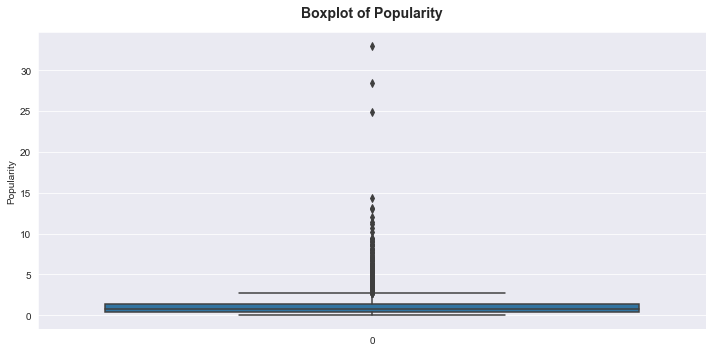

In [51]:
# Make a boxplot for popularity
plt.figure(figsize = (10, 5))
sns.boxplot(data= df['popularity'])
plt.title('Boxplot of Popularity', fontsize = 14, fontweight = 'bold', pad = 15)
plt.ylabel ('Popularity')
plt.tight_layout()
plt.show();

> It looks like there is outliers in popularity variable

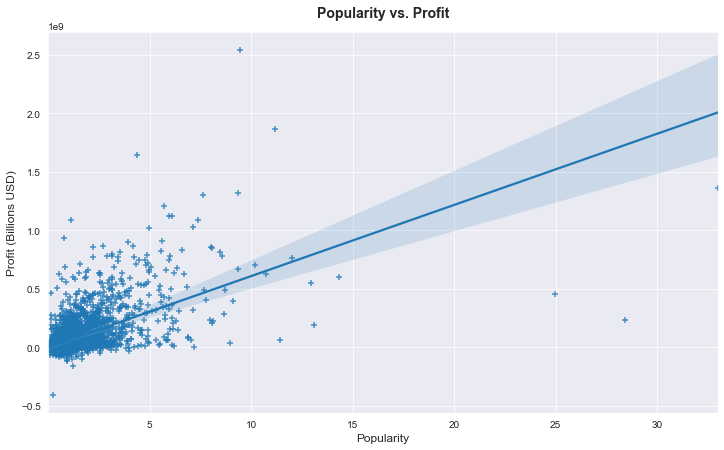

In [26]:
# Make visualization to see the relationship between profit and popularity
plt.figure(figsize = (12, 7))
sns.regplot(data = df, x = 'popularity', y = 'profit', marker = '+')
plt.title('Popularity vs. Profit', fontsize = 14, fontweight = 'bold', pad = 15)
plt.xlabel('Popularity', fontsize = 12)
plt.ylabel('Profit (Billions USD)', fontsize = 12)

plt.show();

In [38]:
df[['popularity', 'profit']].corr()

,popularity,profit
popularity,1.000000,0.596176
profit,0.596176,1.000000


> It looks like the correlation between Popularity and Profit is moderate.  
> We can't make a clear conclusion because there is no detail about how popularity is calculated and what its unit is. And there seems to be a lot of outliers, those outliers are telling us that with high popularity it's not necessarily will make a good profit and vice versa.

### What is the top genres of movies?

In [28]:
# Make a new series contains value counts of each genres
genre_cnt = pd.Series(df['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genre_cnt

Drama              1755
Comedy             1357
Thriller           1204
Action             1085
Adventure           749
Romance             666
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              12
TV Movie              1
dtype: int64

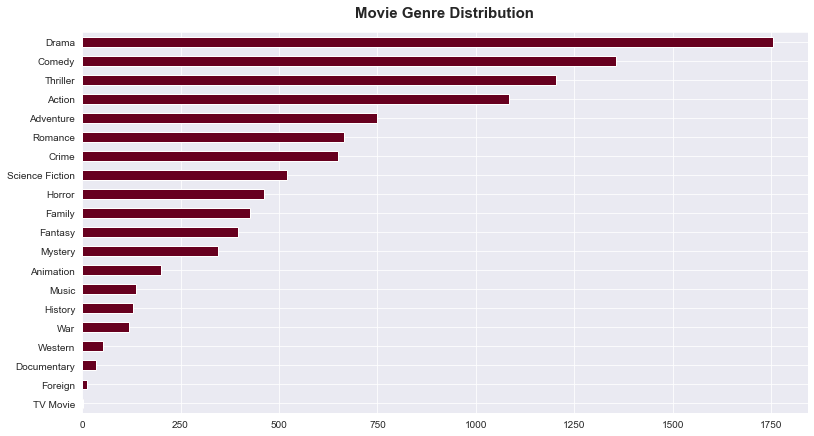

In [29]:
# Visualize the counts to a horizontal bar chart
plt.figure(figsize = (13, 7))
ax = genre_cnt.plot.barh(colormap = 'RdBu')
ax.invert_yaxis()
ax.set_title('Movie Genre Distribution', fontsize = 15, fontweight = 'bold', pad = 15)
plt.show();

> From the chart above, we can see that the top genre in movie is Drama with a count of 1755!

### Who is the movie director with the highest average rating?

In [30]:
# Group dataframe by director, calculate the average rating and sort the values from high to low
df_director = df.groupby('director')['vote_average'].mean().sort_values(ascending = False)
df_director

director
Damien Chazelle                      8.200000
Pete Docter                          8.000000
Tony Kaye                            8.000000
Morten Tyldum                        8.000000
Xavier Dolan                         8.000000
                                       ...   
Dick Maas                            3.700000
Luca Bercovici                       3.600000
Uwe Boll                             3.566667
John Guillermin|Charles McCracken    3.500000
Lawrence Kasanoff                    2.200000
Name: vote_average, Length: 1713, dtype: float64

In [31]:
# Locate the movies directed by Damien Chazell with df.loc
df.loc[df['director'] == 'Damien Chazelle']

,popularity,original_title,budget,revenue,runtime,release_year,vote_average,genres,director,profit
650,4.780419,Whiplash,3300000.0,13993093.0,105.0,2014-01-01,8.2,Drama|Music,Damien Chazelle,10693093.0


> From the list above we can see the top 5 director with the highest average of ratings and **Damien Chazelle** is on top of the list with average rating of **8.2**. We can see that Damien Chazelle only got one movie on this list with a rating 8.2, that is why he got the highest average rating.  


In [32]:
# Now, we will count the movie directed by each director
df_dir_cnt = df['director'].value_counts()
df_dir_cnt.head(10)

Steven Spielberg     27
Clint Eastwood       24
Ridley Scott         21
Woody Allen          18
Martin Scorsese      17
Steven Soderbergh    17
Tim Burton           16
Robert Zemeckis      15
Brian De Palma       15
Oliver Stone         15
Name: director, dtype: int64

<a id='conclusions'></a>
## Conclusions

> While the **average rating** of movies throughout the years is **decreasing**, the **profit** made by movie industries is keep **going up**. The decrease of average rating can be explained by the standard quality of movies upheld by movie critics is getting higher and by the high number of movies released every year compared to the past or the production quality is just getting bad

> **Avatar (2009)** is the movie with biggest profit made with over 2.5 billions US Dollar!

> **Popularity and Profit** have a moderate correlation (r = 0.59). With many outliers that the scatter plot shows, there is no clear relationship between the two  

> The **top genre** in movies produced is **Drama** with total count of 1755 movies  

> The movie director who has the highest average rating is **Damien Chazelle** (8.2) with only one movie **Whiplash (2014)**

## Limitations

> * The budget and revenue currency is not included in dataset, so we can only make the assumption that it's in USD  
> * There is no clear definition of how popularity is calculated  